# Fashion MNIST
Zalando's article images with a dimension of 28x28, which are grayscale. The images are associated with ten different classes. The dataset was intended to
replace the original MNIST dataset which contained the images of the digits.


#### Problem Statement
The aim is to classifiy the images in mulitple categories.
Dataset Description
Label: Class

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

#### Topics Covered:

Tensorflow 2.x

MLP

Sequential Model

 #### Read the dataset and perform exploratory data analysis over the dataset.

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 # We are using dataset present in the tensorflow library. The function return two tuples in form of (x,y),(a,b) which
# can be interpreted as training set(image,label) and testing set(image, label).
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 2s 1us/step


In [4]:
print('The shape of the train_data: ',train_images.shape)
print('The shape of the test_data: ',test_images.shape)

The shape of the train_data:  (60000, 28, 28)
The shape of the test_data:  (10000, 28, 28)


#### visualizing some of the images

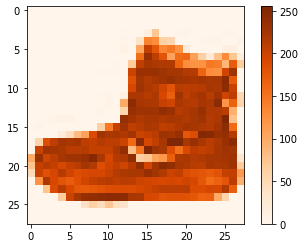

In [5]:
plt.figure()
plt.imshow(train_images[0],cmap='Oranges')
plt.colorbar()
plt.grid(False)
plt.show()

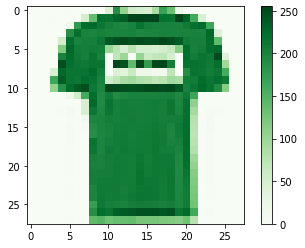

In [6]:
plt.figure()
plt.imshow(train_images[1],cmap='Greens')
plt.colorbar()
plt.grid(False)
plt.show()


In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

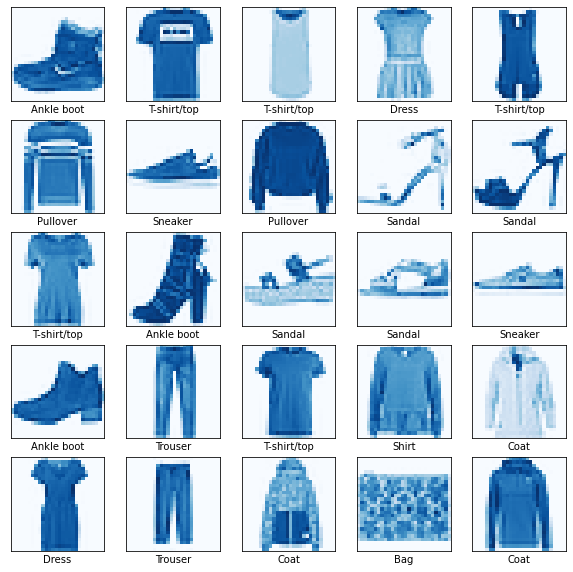

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Build a sequential model.

In [11]:
# Building a sequential model where Flatten layer convert 28x28 grid image into 784 single dimension.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)])


tf.keras.layers.Flatten transforms a 2D image to 1-dimensional (28 * 28 = 784 pixels).

#### Optimize the model using adam optimizer and Cross Entropy as loss function.

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.5019 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3762 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3367 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3128 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2936 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2820 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2676 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2562 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2456 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

#### Evaluate the model based on the accuracy.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3298 - accuracy: 0.8850 - 1s/epoch - 4ms/step

Test accuracy: 0.8849999904632568


####  Plot the predictions of the model against the orginal test image.

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [17]:
np.argmax(predictions[0])

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
         color = 'blue'
    else:
         color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


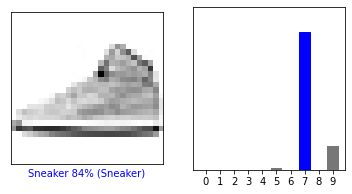

In [19]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

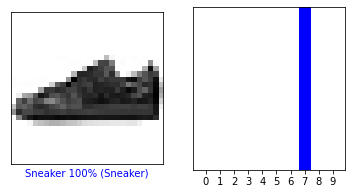

In [20]:
i = 22
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

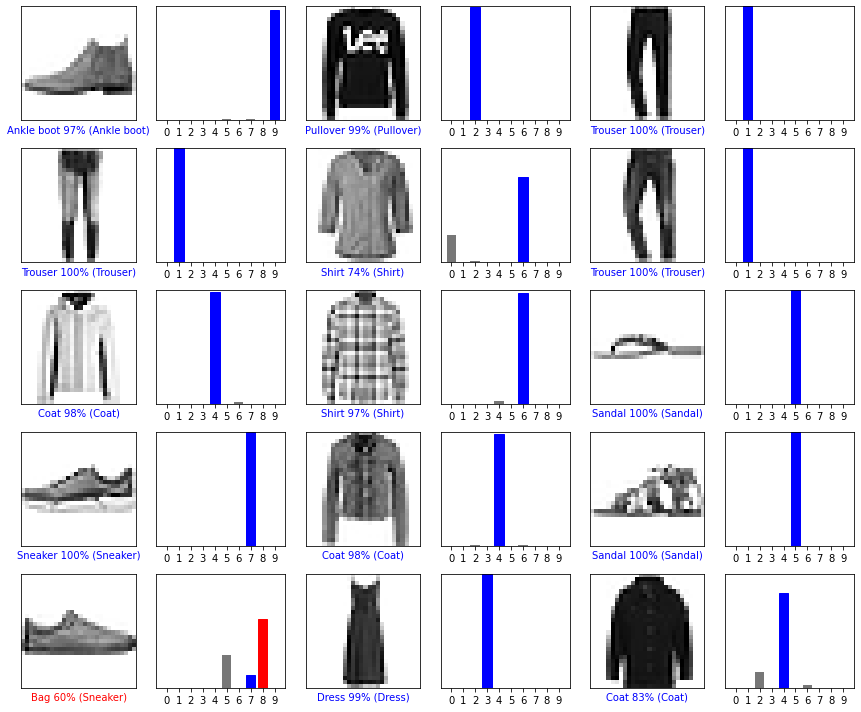

In [22]:
 # Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

created a grid layout where we can see how our model is able to classify the images.
